Reference: 

1) https://facebook.github.io/prophet/docs/quick_start.html

2) https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

3) https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/

4) https://www.kdnuggets.com/2018/11/sales-forecasting-using-prophet.html

5) https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-part-3-predicting-the-future-with-facebook-prophet-3f3af145cdc

6) https://mode.com/example-gallery/forecasting_prophet_python_cookbook

7) https://www.kaggle.com/armamut/predicting-transactions-fb-prophet-tutorial

# 0.0. Imports

In [7]:
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## 0.1. Read dataset

In [8]:
df1 = pd.read_csv( '../data/example_wp_log_peyton_manning.csv', low_memory=False )

In [18]:
df1.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [19]:
df1.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [15]:
m = Prophet()

In [16]:
m.fit( df1 )

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = m.make_future_dataframe( periods=365 )

In [21]:
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [22]:
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [24]:
forecast = m.predict( future )

In [25]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.214553,7.533756,8.919503
3266,2017-01-16,8.539606,7.806158,9.273430
3267,2017-01-17,8.327054,7.596473,9.040897
3268,2017-01-18,8.159720,7.434848,8.954123
3269,2017-01-19,8.171677,7.448881,8.936007


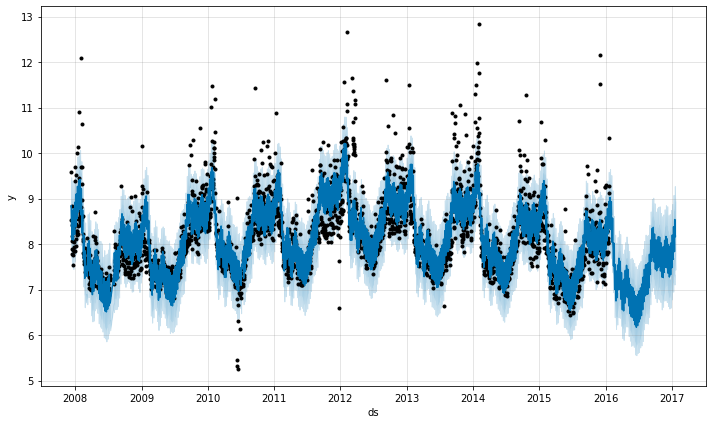

In [26]:
fig1 = m.plot( forecast )

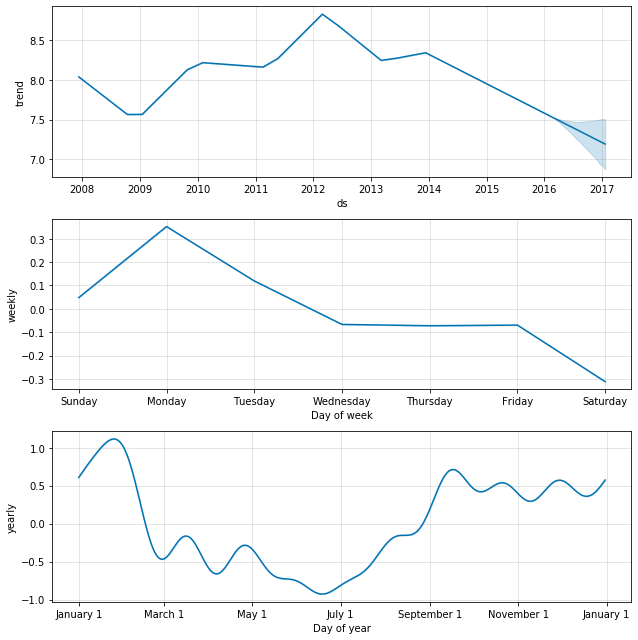

In [27]:
fig2 = m.plot_components( forecast )